In [1]:
#%matplotlib widget
%matplotlib inline

import glob
import os, time
import itertools
import numpy as np
import seaborn as sns
import pandas as pd
from natsort import natsorted
import pygwalker as pyg


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cycler import cycler
from datetime import datetime, timedelta

from scipy.stats import norm
from scipy.optimize import curve_fit #we could import more, but this is what we need
from scipy.stats import linregress

#from misc_process import *
#from misc_process import get_maxima_LSPR

In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data','')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2023-08-29-aunr-dna2-2dna-stability-assembly','')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')
RESULT_DIR_PATH_SI = os.path.join(BASE_DIR_PATH, 'results', 'figs', 'si_figs', 'png', '')


In [3]:
'''
Import example data from UV-Vis-NIR folder
'''

#================ import data =========================#

# import file using read_csv function in pandas
df = pd.read_csv(DATA_UV_DIR_PATH+'2023-08-29-AuNR-DNA2.csv')
columns = df.columns
df_nacl = pd.read_csv(DATA_UV_DIR_PATH + '2023-08-29-AuNR-DNA2.csv', skiprows=1)

df_abs = df_nacl.iloc[:, 1::2]
#df_abs

# Effect of sodium chloride on AuNRs

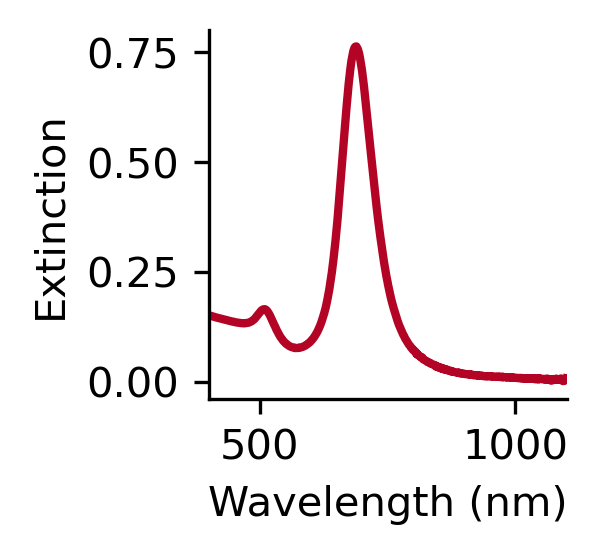

In [6]:
'''
Make a simple figure containing normalized data 
'''
#================ plot data ===========================#

fig = plt.figure(figsize=(2,2), dpi=300) # generate a figure
ax = plt.subplot(1,1,1) #(nrow, ncolumn, index) - make a subplot, there is only one

# Select first 5 columns
df_nacl_init = df_nacl.iloc[:,1:11:2]

# Set color 
cm_subsection = np.linspace(0, 1, len(df_nacl_init.columns))
cyc = cycler(color=[cm.coolwarm_r(x) for x in cm_subsection])
line_widths = [2, 0, 0, 0, 0]
ax.set_prop_cycle(cyc)

# Column names
col_nacl_init = ['AuNRs', '300mM NaCl', '400mM NaCl', '600mM NaCl', '1000mM NaCl']

# Plot data
for i, col in enumerate(df_nacl_init.columns):
    ax.plot(df_nacl['Wavelength (nm)'], df_nacl_init[col], linewidth=line_widths[i])
ax.set_xlim([400,1100])                    # set wavelength limit
#ax.set_ylim([0,2.7])                       # set absorbance limit
#ax.axvline(x=688, color = 'grey', linewidth = 0.75, linestyle = '--')
ax.set_xlabel(r'Wavelength (nm)')          # set axis label
ax.set_ylabel(r'Extinction')              # set axis label

# #================ plot stylisation ====================#

ax.spines['right'].set_visible(False)      # remove spines
ax.spines['top'].set_visible(False)

plt.tight_layout()  
fig.savefig(RESULT_DIR_PATH_SI + 'Fig-S2a.png', bbox_inches='tight', transparent = True)